In [154]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import librosa
import python_speech_features as psf
from scipy.fftpack import dct, idct
# source:
# much of this is taken from this link:
# https://github.com/jameslyons/python_speech_features/blob/master/python_speech_features/base.py

In [180]:
def plot_mfccs(mfccs, n_mfcc):
    num_rows, num_cols = mfccs.shape
    t = range(0, num_cols)
    n_mfcc = 3 if n_mfcc < 0 else min(n_mfcc, num_rows)
    colors = cm.rainbow(np.linspace(0, 1, n_mfcc))
    patches = []
    for i in range(0, n_mfcc):
        patch = mpatches.Patch(color=colors[i], label='mfcc #{0:01d}'.format(i))
        patches.append(patch)
    plt.legend(handles=patches, loc='best', fontsize='small')
    for i in range(0, n_mfcc):
        plt.plot(t, mfccs[i], color=colors[i], linewidth=1)
    plt.title("MFCCs over time frames")
    plt.xlabel("time frame of DFT")
    plt.ylabel("MFCC value")
    plt.show()

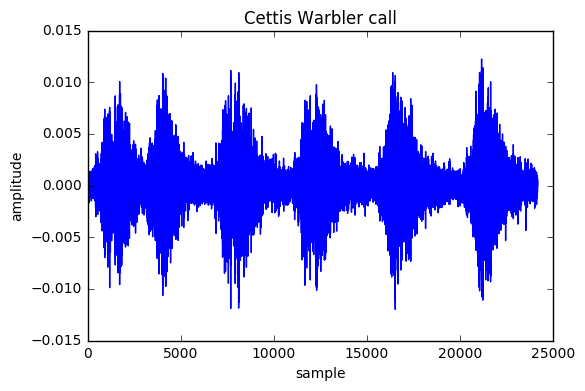

In [156]:
#lark_path_1 = "../zShortBirdRecordings/trainfile067_crested_lark01.wav"
cettis_warbler_path_1 = "../zShortBirdRecordings/trainfile016_CettisWarbler03.wav"
cettis_warbler_signal, cettis_warbler_sample_rate = librosa.load(cettis_warbler_path_1)
plt.plot(cettis_warbler_signal)
plt.title("Cettis Warbler call")
plt.xlabel("sample")
plt.ylabel("amplitude")
plt.show()

In [157]:
# constants
window_length = 0.025
window_step = 0.01
n_filters = 12
nfft = 512
preemph=0.97
ceplifter=22

In [158]:
highfreq = lark_sample_rate/2
signal = psf.sigproc.preemphasis(cettis_warbler_signal,preemph)
frames = psf.sigproc.framesig(signal, window_length*lark_sample_rate, window_step*lark_sample_rate, winfunc=lambda x:np.ones((x,)))
pspec = psf.sigproc.powspec(frames,nfft)
energy = np.sum(pspec,1) # this stores the total energy in each frame
energy = np.where(energy == 0,np.finfo(float).eps,energy) # if energy is zero, we get problems with log

In [163]:
ith_frame_to_show = 5

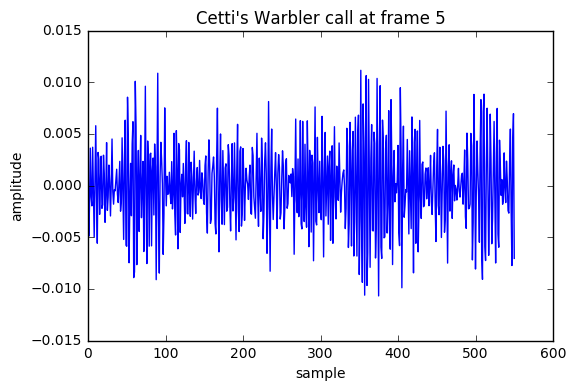

In [164]:
plt.plot(frames[ith_frame_to_show])
plt.title("Cetti\'s Warbler call at frame {0:0d}".format(ith_frame_to_show))
plt.xlabel("sample")
plt.ylabel("amplitude")
plt.show()

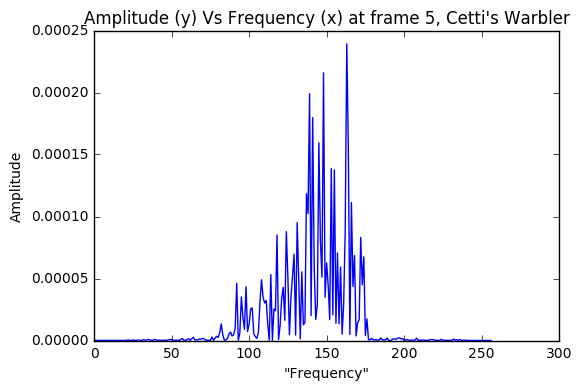

In [170]:
plt.plot(pspec[ith_frame_to_show])
plt.title("Amplitude (y) Vs Frequency (x) at frame {0:0d}, Cetti\'s Warbler".format(ith_frame_to_show))
plt.xlabel("\"Frequency\"")
plt.ylabel("Amplitude")
plt.show()

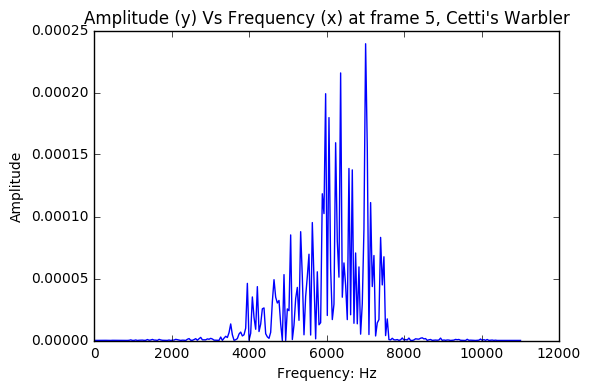

In [169]:
the_x_axis = [(x * lark_sample_rate) / float(nfft+1) for x in range(0, len(pspec[ith_frame_to_show]))]
plt.plot(the_x_axis, pspec[ith_frame_to_show])
plt.title("Amplitude (y) Vs Frequency (x) at frame {0:0d}, Cetti\'s Warbler".format(ith_frame_to_show))
plt.xlabel("Frequency: Hz")
plt.ylabel("Amplitude")
plt.show()

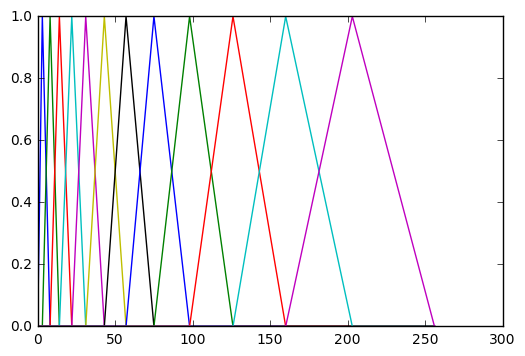

(12, 257)


In [179]:
filter_banks = psf.get_filterbanks(nfilt=n_filters, nfft=nfft, samplerate=lark_sample_rate)
x_range = range(0, filter_banks.shape[1])
for i in range(0, filter_banks.shape[0]):
    fb = plt.plot(x_range, filter_banks[i])
plt.show()
print(filter_banks.shape)

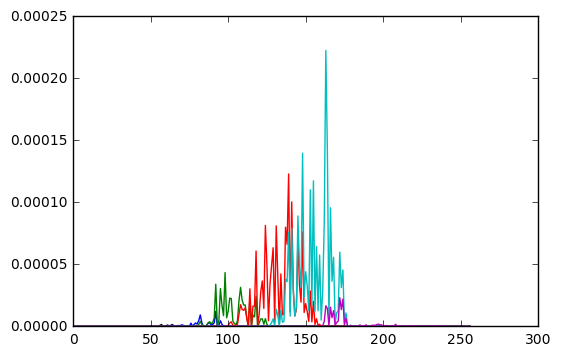

In [138]:
ith_pspec = pspec[ith_frame_to_show]
#print(type(ith_frame))
#print(type(filter_banks))
signal_transformed = [ith_pspec * filter_banks[filter_bank_index] for filter_bank_index in range(0, len(filter_banks))]
for i in range(0, len(signal_transformed)):
    plt.plot(signal_transformed[i])
plt.show()

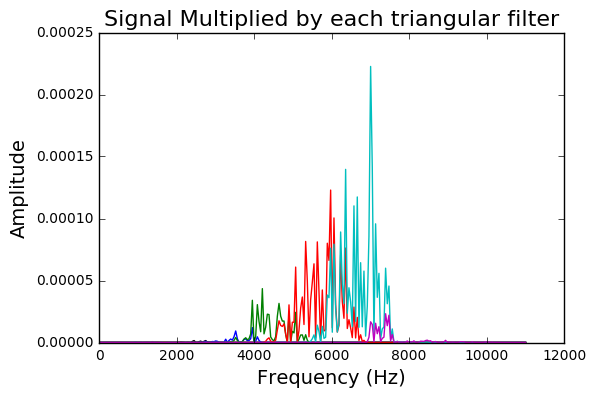

In [175]:
ith_pspec = pspec[ith_frame_to_show]
#print(type(ith_frame))
#print(type(filter_banks))
signal_transformed = [ith_pspec * filter_banks[filter_bank_index] for filter_bank_index in range(0, len(filter_banks))]
for i in range(0, len(signal_transformed)):
    plt.plot(the_x_axis, signal_transformed[i])
plt.title("Signal Multiplied by each triangular filter", fontsize=16)
plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.show()

In [140]:
feat = np.dot(pspec, filter_banks.T) # compute the filterbank energies
feat = np.where(feat == 0, np.finfo(float).eps, feat) # if feat is zero, we get problems with log

In [141]:
print(feat.shape)

(108, 12)


In [142]:
n_mfcc = 6
# MFCC step
log_feat = np.log(feat)
mfcc_coeffs = dct(log_feat, type=2, axis=1, norm='ortho')[:, :n_mfcc]
mfcc_coeffs[:,0] = np.log(energy)

In [143]:
mfcc_coeffs_liftered = psf.lifter(mfcc_coeffs, ceplifter)
mfcc_coeffs_liftered[:,0] = np.log(energy)
mfcc_final = mfcc_coeffs_liftered.T

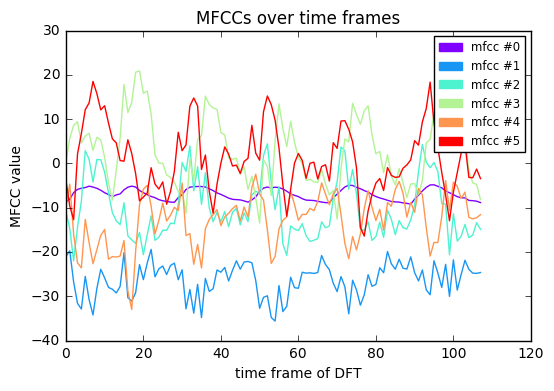

In [182]:
plot_mfccs(mfcc_final, 6)

In [110]:
print(mfcc_final.shape)

(6, 44)


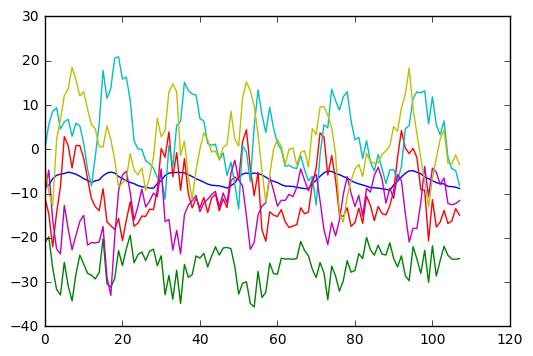

In [181]:
for i in range(0, mfcc_final.shape[0]):
    plt.plot(mfcc_final[i])
plt.show()